In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('./Data/onlinefraud.csv')

In [10]:
print(df.head()) 

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig   
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36  \
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


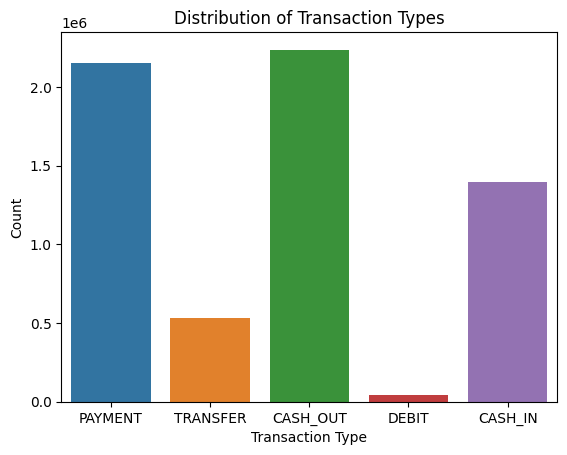

In [20]:
sns.countplot(x='type', data=df)
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.title('Distribution of Transaction Types')
plt.show()

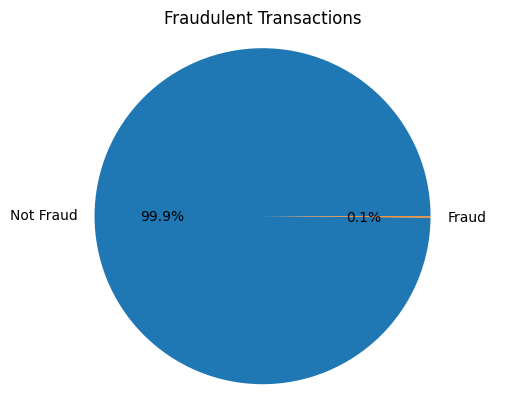

In [21]:
fraud_counts = df['isFraud'].value_counts()
plt.pie(fraud_counts, labels=['Not Fraud', 'Fraud'], autopct='%1.1f%%')
plt.title('Fraudulent Transactions')
plt.axis('equal')
plt.show()

In [29]:
flagged_fraud_records = df[df['isFlaggedFraud'] == 1]

print(flagged_fraud_records.size)

176


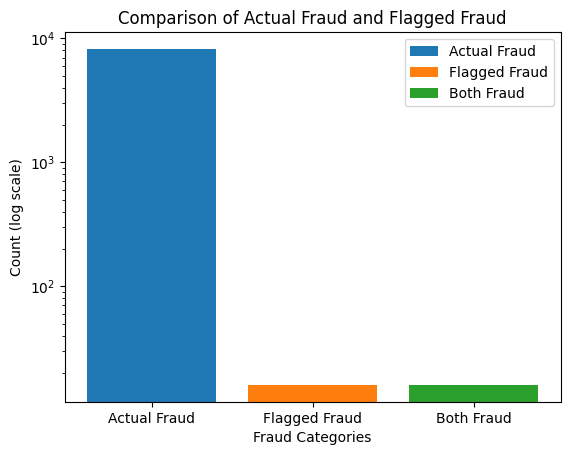

In [28]:
actual_fraud_count = len(df[df['isFraud'] == 1])
flagged_fraud_count = len(df[df['isFlaggedFraud'] == 1])
both_fraud_count = len(df[(df['isFraud'] == 1) & (df['isFlaggedFraud'] == 1)])

plt.bar(['Actual Fraud'], [actual_fraud_count], label='Actual Fraud')
plt.bar(['Flagged Fraud'], [flagged_fraud_count], label='Flagged Fraud')
plt.bar(['Both Fraud'], [both_fraud_count], label='Both Fraud')

plt.xlabel('Fraud Categories')
plt.ylabel('Count (log scale)')
plt.yscale('log')  # I used logarithmic axes to actually show the data
plt.title('Comparison of Actual Fraud and Flagged Fraud')
plt.legend()
plt.show()

In [43]:
missing_records_count = df.isnull().any(axis=1).sum()

print("Number of incompleate records:", missing_records_count)

Number of incompleate records: 16


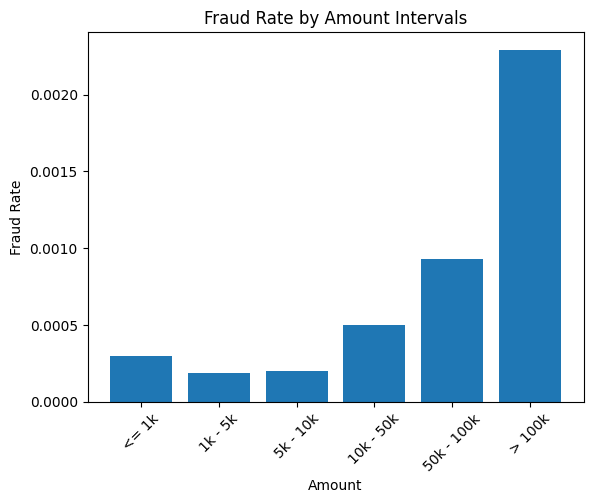

In [32]:
amount_bins = [0, 1000, 5000, 10000, 50000, 100000, np.inf]
bin_labels = ['<= 1k', '1k - 5k', '5k - 10k', '10k - 50k', '50k - 100k', '> 100k']

df['amount_bin'] = pd.cut(df['amount'], bins=amount_bins, labels=bin_labels)

fraud_rate = df.groupby('amount_bin')['isFraud'].mean()

plt.bar(bin_labels, fraud_rate)
plt.xlabel('Amount')
plt.ylabel('Fraud Rate')
plt.title('Fraud Rate by Amount Intervals')
plt.xticks(rotation=45)
plt.show()

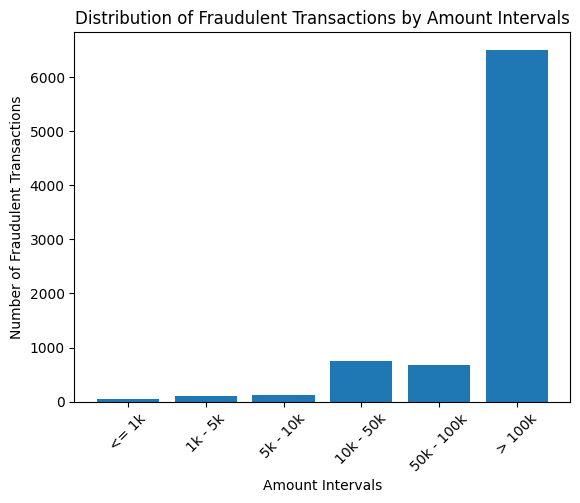

In [41]:
fraudulent_transactions = df[df['isFraud'] == 1]

amount_bins = [0, 1000, 5000, 10000, 50000, 100000, np.inf]
bin_labels = ['<= 1k', '1k - 5k', '5k - 10k', '10k - 50k', '50k - 100k', '> 100k']

fraudulent_transactions.loc[:, 'amount_bin'] = pd.cut(fraudulent_transactions['amount'], bins=amount_bins, labels=bin_labels)

fraud_counts = fraudulent_transactions['amount_bin'].value_counts().sort_index()

plt.bar(bin_labels, fraud_counts)
plt.xlabel('Amount Intervals')
plt.ylabel('Number of Fraudulent Transactions')
plt.title('Distribution of Fraudulent Transactions by Amount Intervals')
plt.xticks(rotation=45)
plt.show()